In [1]:
from bg import *

In [2]:
bgsys = system([])

In [3]:
bonds = []

In [4]:
bonds.append(bond.from_bond_string('[SE   ]   __ 1__>| [1J   ]'))
bonds.append(bond.from_bond_string('[I2   ] |<__ 2__   [1J   ]'))
bonds.append(bond.from_bond_string('[C3   ]  <__ 3__ | [1J   ]'))
bonds.append(bond.from_bond_string('[1J   ] | __ 4__>  [R    ]'))
bonds.append(bond.from_bond_string('[1J   ] | __ 5__>  [TF_m ]'))
bonds.append(bond.from_bond_string('[TF_m ] | __ 6__>  [0J   ]'))
bonds.append(bond.from_bond_string('[0J   ] | __ 7__>  [C7   ]'))
bonds.append(bond.from_bond_string('[0J   ]   __ 8__>| [I8   ]'))

In [5]:
#bonds.append(bond( 15 ,    'I', '1J-5'  , 'L' , 'L'))
#bonds.append(bond( 14 , '1J-5', 'TF.Ab'  , 'L' , 'L'))
#bonds.append(bond( 13 ,'TF.Ab', '1J-4'  , 'L' , 'L'))
#bonds.append(bond( 12 ,   'Rb', '1J-4'  , 'R' , 'L'))
#bonds.append(bond.from_bond_string('[SE   ]  <__16__ | [1J-5 ]' ))
#bonds.append(bond.from_bond_string('[1J-4 ] |<__11__   [0J-1 ]' ))
#bonds.append(bond.from_bond_string('[0J-1 ] | __10__>  [1J-3 ]' ))
#bonds.append(bond.from_bond_string('[Rv40 ]  <__ 9__ | [1J-3 ]' ))
#bonds.append(bond.from_bond_string('[1J-3 ] | __ 8__>  [Rl40 ]' ))
#bonds.append(bond.from_bond_string('[1J-3 ] | __ 7__>  [0J-2 ]' ))
#bonds.append(bond.from_bond_string('[1J-2 ] | __ 6__>  [Cacc1]' ))
#bonds.append(bond.from_bond_string('[Rp2  ]  <__ 5__ | [1J-2 ]' ))
#bonds.append(bond.from_bond_string('[0J-2 ] | __ 4__>  [1J-2 ]' ))
#bonds.append(bond.from_bond_string('[0J-2 ]   __ 3__>| [1J-1 ]' ))
#bonds.append(bond.from_bond_string('[1J-1 ]   __ 2__>| [Rp3  ]' ))
#bonds.append(bond.from_bond_string('[1J-1 ] | __ 1__>  [Cacc2]' ))
#bonds.append(bond.from_bond_string('[1J-5 ] | __17__>  [TF.an]' ))
#bonds.append(bond.from_bond_string('[TF.an] | __18__>  [1J-6 ]' ))
#bonds.append(bond.from_bond_string('[Ra   ]  <__19__ | [1J-6 ]' ))
#bonds.append(bond.from_bond_string('[1J-6 ] | __20__>  [Rv70 ]' ))
#bonds.append(bond.from_bond_string('[1J-6 ] | __21__>  [Rv20 ]' ))
#bonds.append(bond.from_bond_string('[1J-6 ] | __22__>  [0J-1 ]' ))

In [6]:
# add bonds to the system
for bond in bonds:
    bgsys.add_bond(bond)

print(bgsys)

system([bond(1,"SE","1J","R", "R"),
bond(2,"I2","1J","L", "L"),
bond(3,"C3","1J","R", "L"),
bond(4,"1J","R","L", "R"),
bond(5,"1J","TF_m","L", "R"),
bond(6,"TF_m","0J","L", "R"),
bond(7,"0J","C7","L", "R"),
bond(8,"0J","I8","R", "R"),
])


In [7]:
e_dict = {}
f_dict = {}
for bond in bonds:
    n = bond.num
    e_dict[n] = 'e_'+str(n)
    f_dict[n] = 'f_'+str(n)

In [8]:
for k,v in f_dict.items():
    print(k, v)

1 f_1
2 f_2
3 f_3
4 f_4
5 f_5
6 f_6
7 f_7
8 f_8


In [46]:
e1s = bgsys.get_single_ports()
print(e1s)

['SE', 'I2', 'C3', 'R', 'C7', 'I8']


In [67]:
def get_elem_from_name(name):
    sn = str(name)
    if   sn.startswith('SE'):
        # print('SE')
        return elem_SE(sn)
    elif sn.startswith('R'):
        #print('R')
        return elem_R(sn)
    elif sn.startswith('I'):
        #print('I')
        return elem_I(sn)
    elif sn.startswith('C'):
        #print('C')
        return elem_C(sn)
    elif sn.startswith('0J'):
        #print('0J')
        return elem_0J(sn)
    elif sn.startswith('1J'):
        #print('1J')
        return elem_1J(sn)
    elif sn.startswith('TF'):
        #print('TF')
        return elem_TF(sn)
    else: # SF
        #print('SF')
        return elem_SF(sn)


In [70]:
e = get_elem_from_name('RR-1')

In [72]:
print(e.e)

R*f


In [45]:
# loop over 1 port elements
for elem in e1s:
    e = element(elem)
    print(f'elem type = {e.etype}')
    if e.etype == 'SE':
        e = elem_SE(elem)

elem type = SE
elem type = I
elem type = C
elem type = R
elem type = C
elem type = I


In [11]:
bond = bonds[1]
bs  = bond.__str__()

csl = bs[8]
pel = bs[9]
if csl == '|':
  cs_dir = 'L'
else:
  cs_dir = 'R'

if pel == '<':
  pe_dir = 'L'
else:
  pe_dir = 'R'

num = int(bs.split('__')[1])
NL = bs[1:6].strip()
NR = bs[-6:-1].strip()

print(f'{bs}')
print(f'csl =|{csl}|')
print(f'pel =|{pel}|')
print(f'   |12345|')
print(f'NL |{NL}|')
print(f'NR |{NR}|')
print(f'num|{num:2d}|')

print(f'i think i got: bond({num}, {NL}, {NR}, {cs_dir}, {pe_dir})')

[I2   ] |<__ 2__   [1J   ]
csl =|||
pel =|<|
   |12345|
NL |I2|
NR |1J|
num| 2|
i think i got: bond(2, I2, 1J, L, L)


In [12]:
bondref = bonds[0]
bondref_str = bondref.__str__()

newbond = bond.from_bond_string(bondref_str)

print(newbond)

[SE   ]   __ 1__>| [1J   ]


In [13]:
bdict = {}
for bond in bonds:
    nls = bond.nls
    nrs = bond.nrs
    if nls in bdict:
        bdict[nls].append(nrs)
    else:
        bdict.setdefault(nls,[])
        bdict[nls].append(nrs)
    
    if nrs in bdict:
        bdict[nrs].append(nls)
    else:
        bdict.setdefault(nrs,[])
        bdict[nrs].append(nls)
        
    print(bond)

for k, v in bdict.items():
    print(k,v)

[SE   ]   __ 1__>| [1J   ]
[I2   ] |<__ 2__   [1J   ]
[C3   ]  <__ 3__ | [1J   ]
[1J   ] | __ 4__>  [R    ]
[1J   ] | __ 5__>  [TF_m ]
[TF_m ] | __ 6__>  [0J   ]
[0J   ] | __ 7__>  [C7   ]
[0J   ]   __ 8__>| [I8   ]
SE ['1J']
1J ['SE', 'I2', 'C3', 'R', 'TF_m']
I2 ['1J']
C3 ['1J']
R ['1J']
TF_m ['1J', '0J']
0J ['TF_m', 'C7', 'I8']
C7 ['0J']
I8 ['0J']


In [14]:
#bdict

In [15]:
#bgsys.elem_nbrs

In [16]:
import networkx as nx
import matplotlib.pylab as plt

In [17]:
graph_dict = {
    'A' : ['B', 'S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C' 'G'],
}

In [18]:
#G['TF.Ab']['1J-5']['color'] = 'red'
G = nx.Graph(bdict)

In [19]:
#bonds

In [20]:
for n in list(G.nodes):
    print(f'__________________')
    #fstr = ""
    #print(f'{n:5s}: {G.adj[n]}')
    for nbr in G.adj[n]:
        for bond in bonds:
            if bond.nrs == n and bond.nls == nbr:
                print(f'{n:5s}-{nbr:5s} pair belong to bond #{bond.num}')
                G[n][nbr]['bond_num'] = bond.num
            elif bond.nls == n and bond.nrs == nbr:
                print(f'{n:5s}-{nbr:5s} pair belong to bond #{bond.num}')
                G[n][nbr]['bond_num'] = bond.num
    #    fstr += f'|{nbr:5s}| '
    #print(f'{n:5s} with friends: {fstr}')
#for e in list(G.edges):

__________________
SE   -1J    pair belong to bond #1
__________________
1J   -SE    pair belong to bond #1
1J   -I2    pair belong to bond #2
1J   -C3    pair belong to bond #3
1J   -R     pair belong to bond #4
1J   -TF_m  pair belong to bond #5
__________________
I2   -1J    pair belong to bond #2
__________________
C3   -1J    pair belong to bond #3
__________________
R    -1J    pair belong to bond #4
__________________
TF_m -1J    pair belong to bond #5
TF_m -0J    pair belong to bond #6
__________________
0J   -TF_m  pair belong to bond #6
0J   -C7    pair belong to bond #7
0J   -I8    pair belong to bond #8
__________________
C7   -0J    pair belong to bond #7
__________________
I8   -0J    pair belong to bond #8


In [21]:
num = bgsys.get_bond_num('Rv20', '1J-6')
print(num)

for bond in bgsys.bonds:
    if bond.num == num:
        print(bond)

-1


In [22]:
b = bgsys.get_bond_bynum(21)
print(b)

None


In [23]:
list(G.edges())

[('SE', '1J'),
 ('1J', 'I2'),
 ('1J', 'C3'),
 ('1J', 'R'),
 ('1J', 'TF_m'),
 ('TF_m', '0J'),
 ('0J', 'C7'),
 ('0J', 'I8')]

In [24]:
def get_bond(bond_num, bondlist):
    for bond in bondlist:
        if bond_num == bond.num:
            return bond
    return None

In [25]:
bgsys.get_bond_num('I','1J-5')

-1

In [26]:
print(bgsys.get_bond('I','1J-5'))

None


In [27]:
# get the single port elements
sp = bgsys.get_single_ports()

# loop over single port elements
for e in sp:
    if e.startswith('SE'):
        # get neibors of sp element
        nb = bgsys.get_nbrs(e)[0]
        # get bond associated with these two elements
        bond = bgsys.get_bond(e,nb)
        print(f'{e:5s} has nb = {nb}, connected via bond: {bond}')

SE    has nb = 1J, connected via bond: [SE   ]   __ 1__>| [1J   ]


C:\Users\flyntga\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


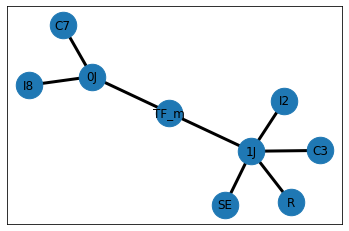

In [28]:
#G = nx.Graph(graph_dict)

options = {
    'node_size' : 700,
    'width': 3,
}
pos = nx.spring_layout(G)
nx.draw_networkx_nodes( G,pos, **options)
nx.draw_networkx_edges( G,pos, **options)
nx.draw_networkx_labels(G,pos, **options)

plt.show()

In [29]:
list(G.nodes)

['SE', '1J', 'I2', 'C3', 'R', 'TF_m', '0J', 'C7', 'I8']

In [30]:
b = bgsys.get_bond('I','1J-5')
elem = elem_I('I')

In [31]:
print(elem)

I:I    


In [32]:
b = bgsys.get_bond_bynum(7)
print(f'bond# {b.num} : e = {b.e}')
print(f'bond# {b.num} : f = {b.f}')

bond# 7 : e = e_7
bond# 7 : f = f_7


In [33]:
two_port_elems = bgsys.get_two_ports()

In [34]:
for e in two_port_elems:
    nbrs = bgsys.get_nbrs(e)
    for nbr in nbrs:
        b = bgsys.get_bond(e, nbr)
        print(f'found e:{e}, nbr: {nbr} bond: {b}')

found e:TF_m, nbr: 1J bond: [1J   ] | __ 5__>  [TF_m ]
found e:TF_m, nbr: 0J bond: [TF_m ] | __ 6__>  [0J   ]


In [35]:
for e in two_port_elems:
    bonds = bgsys.get_elem_bonds(e)
    TFelem = elem_TF(e,bonds[0],bonds[1])
    print(TFelem)
    print(TFelem.p1['b'], TFelem.p2['b'])
    print(f"p1.e = {TFelem.p1['e']}")
    print(f"p1.b.e {TFelem.p1['b'].e}")
    print(f"p2.e = {TFelem.p2['e']}")
    print(f"p2.b.e {TFelem.p2['b'].e}")
    print(f"p1.f = {TFelem.p1['f']}")
    print(f"p1.b.f {TFelem.p1['b'].f}")
    print(f"p2.f = {TFelem.p2['f']}")
    print(f"p2.b.f {TFelem.p2['b'].f}")
    print()

b = bgsys.get_bond_bynum(7)
print(f"b.e = {b.e}")
print(f"b.f = {b.f}")

TF:TF_m 
[1J   ] | __ 5__>  [TF_m ] [TF_m ] | __ 6__>  [0J   ]
p1.e = m*TF_m.p2.e
p1.b.e m*TF_m.p2.e_5
p2.e = TF_m.p2.e
p2.b.e e_6
p1.f = TF_m.p1.f
p1.b.f f_5
p2.f = m*TF_m.p1.f
p2.b.f m*TF_m.p1.f_6

b.e = e_7
b.f = f_7


In [36]:
e = '0J'
bonds = bgsys.get_elem_bonds(e)
sb = bonds[0]
for bond in bonds:
    if bond.nls == e:
        print(bond)
    else:
        print(bond.print_rev())
    if bond.nls == e:
        if bond.csd == 'L':
            sb = bond
    else:
        if bond.csd == 'R':
            sb = bond

print(f'strong bond is: {sb}')
print(f'sb.e = {sb.e}')

[0J   ]  <__ 6__ | [TF_m ]
[0J   ] | __ 7__>  [C7   ]
[0J   ]   __ 8__>| [I8   ]
strong bond is: [0J   ] | __ 7__>  [C7   ]
sb.e = e_7


In [37]:
e = '1J'
bonds = bgsys.get_elem_bonds(e)
e0j = elem_1J(e, bonds)
print(f'strong bond is {e0j.sb}')
e0j.print_bonds()

strong bond is [I2   ] |<__ 2__   [1J   ]
[1J   ] |<__ 1__   [SE   ]
[1J   ]   __ 2__>| [I2   ]
[1J   ] | __ 3__>  [C3   ]
[1J   ] | __ 4__>  [R    ]
[1J   ] | __ 5__>  [TF_m ]


In [38]:
for b in bonds:
    pin = b.is_ped_into_elem(e)
    if b.nls == e:
        print(f'bond: {b} nls= {b.nls:5s}, b.e = {b.e}')
        #print(f'bond: {b} nls= {b.nls}, b.f = {b.f}')
    else:
        print(f'bond: {b.print_rev()} nls= {b.nls:5s}, b.e = {b.e}')
        #print(f'bond: {b.print_rev()} nls= {b.nls}, b.f = {b.f}')
    
    # if b.nls == e and b.ped == 'L':
    #     print(f'bond {b.num} pwrIN=1')
    # if b.nrs == e and b.ped == 'R':
    #     print(f'bond {b.num} pwrIN=1')

bond: [1J   ] |<__ 1__   [SE   ] nls= SE   , b.e = -( -e_2 -e_3 -e_4 -e_5)_1
bond: [1J   ]   __ 2__>| [I2   ] nls= I2   , b.e = +( +e_1 -e_3 -e_4 -e_5)_2
bond: [1J   ] | __ 3__>  [C3   ] nls= C3   , b.e = +( +e_1 -e_2 -e_4 -e_5)_3
bond: [1J   ] | __ 4__>  [R    ] nls= 1J   , b.e = +( +e_1 -e_2 -e_3 -e_5)_4
bond: [1J   ] | __ 5__>  [TF_m ] nls= 1J   , b.e = +( +e_1 -e_2 -e_3 -e_4)_5


In [39]:
e = 'TF_m'

p1 = {
    'e' : e+'.'+'p1.e',
    'f' : e+'.'+'p1.f',
}
p2 = {
    'e' : e+'.'+'p2.e',
    'f' : e+'.'+'p2.f',
}

bonds = bgsys.get_elem_bonds(e)
p2['b'] = bonds[0]
p1['b'] = bonds[1]

if p1['b'].nls == e:
    print(f"{p1['b'].print_rev()} --> {p2['b'].print_rev()}")
else:
    print(f"{p1['b']} --> {p2['b']}")


#for b in bonds:
# check port 1's bond only?? i think
b = p1['b']
print('---------------')
if b.nls == e:
    print(b.print_rev())
else:
    print(b)
print()

# work with our TF elem on the right side
if b.nrs == e:
    print(f'[OK] NODE R is {e}')
    # check causal stroke direction
    print(f'CS dir = {b.csd}')
    
    if b.csd == 'L':
        print('wow. Causal stroke is on the left!')
        print('TF is getting flow from the 1st bond')
        p2['f'] = 'm*' + p1['f']
        p1['e'] = 'm*' + p2['e']
    else:
        print('wowzer. cs is on the Right')
        print('TF is getting effort from the 1st bond')
        p1['f'] = p2['f'] + '/m'
        p2['e'] = p1['e'] + '/m'
        
# case where TF elem is on the left side
else:
    print(f'[OK] NODE L is {e}')
    print(b)
    # check causal stroke direction
    print(f'CS dir = {b.csd}')
    if b.csd == 'L':
        print('wow. Causal stroke is on the left!')
        print('TF is giving flow to the 1st bond')
        p1['f'] = p2['f'] + '/m'
        p2['e'] = p1['e'] + '/m'
    else:
        print('wowzer. cs is on the Right')
        print('TF is giving effort to the 1st bond')
        p2['f'] = 'm*' + p1['f']
        p1['e'] = 'm*' + p2['e']


[0J   ]  <__ 6__ | [TF_m ] --> [TF_m ]  <__ 5__ | [1J   ]
---------------
[0J   ]  <__ 6__ | [TF_m ]

[OK] NODE L is TF_m
[TF_m ] | __ 6__>  [0J   ]
CS dir = L
wow. Causal stroke is on the left!
TF is giving flow to the 1st bond


In [40]:
print(f"p1['e'] = {p1['e']}")
print(f"p2['e'] = {p2['e']}")
print(f"p1['f'] = {p1['f']}")
print(f"p2['f'] = {p2['f']}")

p1['e'] = TF_m.p1.e
p2['e'] = TF_m.p1.e/m
p1['f'] = TF_m.p2.f/m
p2['f'] = TF_m.p2.f


In [41]:
R = elem_R('R')
print(R)
print(f'   e = {R.e}')
print(f'   f = {R.f}')

R:R    
   e = R*f
   f = e/R


In [42]:
C = elem_C('C7')
print(C)
print(f'   e = {C.e}')

C:C7   
   e = q/C


In [43]:
elem = elem_SE('SE')
print(elem)
print(f'   e = {elem.e}')

SE:SE   
   e = E(t)
